# Problem Set 4, due May 16 at 11:59am, mid-day, noon.

### Before You Start

This is a fun but challenging problem set. It will test your python skills, as well as your understanding of the material in class and in the readings. Start early and debug often! Some notes:

* Part 1 is meant to be easy, so get through it quickly.
* Part 2 (especially 2.1) will be difficult, but it is the lynchpin of this problem set to make sure to do it well and understand what you've done. If you find your gradient descent algorithm is taking more than a few minutes to complete, debug more, compare notes with others, and go to the TA sessions.
* Depending on how well you've done 2.1, parts 2.3 and 3.3 will be relatively painless or incredibly painful. 
* Part 3 (especially 3.3) will be computationally intensive. Don't leave this until the last minute, otherwise your code might be running when the deadline arrives.
* Do the extra credit problems last.

---

## Introduction to the assignment

As with the last assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).

In [91]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline  
import sklearn
import sklearn.linear_model
import statsmodels.formula.api as smf

from sklearn.datasets import load_boston
bdata = load_boston()

In [4]:
# Indices for boston data
CRIM = 0
ZN = 1
INDUS = 2
CHAS = 3
NOX = 4
RM = 5
AGE = 6
DIS = 7
RAD = 8
TAX = 9
PTRATIO = 10
B = 11
LSTAT = 12

---

## Part 1: Getting oriented

Use different learning rates

### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between  median housing price and number of rooms per house. Do this by first (a) regressing the housing price on the number of rooms per house, and then (b) regressing the housing price on the number of rooms per house and the (number of rooms per house) squared.  **Interpret your results.**

In [58]:
rm_medv_reg = sklearn.linear_model.LinearRegression()
boston_rm = bdata.data[:, None, RM]
rm_medv_reg.fit(boston_rm, bdata.target)

print 'Regression for MEDV ~ RM:'
print '\tCoefficients:', rm_medv_reg.coef_
print '\tIntercept:', rm_medv_reg.intercept_
print '\tVariance score: %.2f' % rm_medv_reg.score(boston_rm, bdata.target)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((rm_medv_reg.predict(boston_rm) - bdata.target) ** 2))
print

boston_rm2 = np.concatenate((boston_rm, np.square(boston_rm)), axis=1)
rm_medv_reg2 = sklearn.linear_model.LinearRegression()
rm_medv_reg2.fit(boston_rm2, bdata.target)

print 'Regression for MEDV ~ RM + RM^2:'
print '\tCoefficients:', rm_medv_reg2.coef_
print '\tIntercept:', rm_medv_reg2.intercept_
print '\tVariance score: %.2f' % rm_medv_reg2.score(boston_rm2, bdata.target)
print("Residual sum of squares: %.2f"
      % np.mean((rm_medv_reg2.predict(boston_rm2) - bdata.target) ** 2))


Regression for MEDV ~ RM:
	Coefficients: [ 9.10210898]
	Intercept: -34.6706207764
	Variance score: 0.48
Residual sum of squares: 43.60

Regression for MEDV ~ RM + RM^2:
	Coefficients: [-22.64326237   2.47012384]
	Intercept: 66.0588474848
	Variance score: 0.55
Residual sum of squares: 38.12


When regressing with just the average number of rooms per house, we get a coefficient of 9.1, indicating that there is a strong positively correlated relationship between the number of rooms in a house and the median household value. The intercept for this regression is -34.67, which does not make too much sense. The negative intercept suggests that a house with 1 room will have a negative price. Our simple regression is probably not the best model for our data.

For our second regression, we get a parabola with a y-intercept at 66.06, an RM coeff of -22.64 and RM-squared coeff of 2.47. This means that a house with 0 rooms starts at a baseline of around $66k, goes down as the rooms increase for a while, and then picks back up once a sufficient number of rooms has been reached. Looking at the variance score, it seems that our second regression is the more 'accurate' regression for our dataset. The residual sum of squares score also indicates that the second regression has less error associated with it.

### 1.2 Training and testing

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use k-fold cross-validation to fit regression (a) above, i.e. the linear fit of housing price on number of rooms per house. Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Plot the distribution of the k slope coefficients, and draw a vertical line at the value of the slope coefficient that you estimated in 1.1 using the full dataset.  What do you observe?

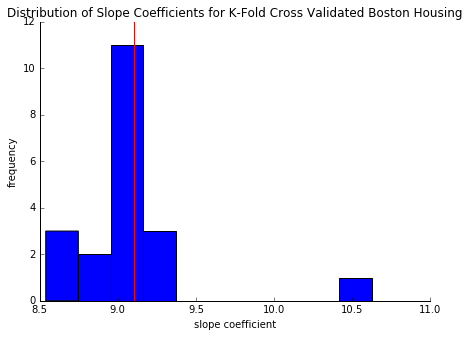

In [42]:
# edit the code below to make the graph look good
def simple_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

cv_reg = sklearn.linear_model.LinearRegression()

slope_coeffs = []
for train, test in sklearn.cross_validation.KFold(len(bdata.data), n_folds=20):
    boston_train_x = boston_rm[train]
#     boston_test_x = boston_rm[test]
    boston_train_y = bdata.target[train]
#     boston_test_y = bdata.target[test]
    cv_reg.fit(boston_train_x, boston_train_y)
    slope_coeffs.append(cv_reg.coef_[0])

plt.figure(figsize=(7,5))
plt.hist(slope_coeffs)
plt.axvline(x=rm_medv_reg.coef_[0], color='red')
plt.title('Distribution of Slope Coefficients for K-Fold Cross Validated Boston Housing')
plt.xlabel('slope coefficient')
plt.ylabel('frequency')
simple_axes(plt.axes())

From looking at the distribution of slope coefficients from our cross-validation step, our non-cv slope coefficient seems to fall right in place with the most frequent values (between 9 and 9.25). It looks like the slope coefficients could possibly be normally distributed, though it's hard to tell.

### 1.3 Regression lines

Create a scatterplot of housing price on rooms per house, and add the two regression lines from 1.1 (or 1.2 if you prefer to do so). Show the linear regression line in red, and the linear+quadratic regression line (which may have curvature) in blue.  Label these two regression lines with the corresponding regression equations (i.e. the slope and intercept of the line).

Bonus: Add the 95% confidence bands (i.e.,  the area that has a 95% chance of containing the true regression line) to each of these lines.

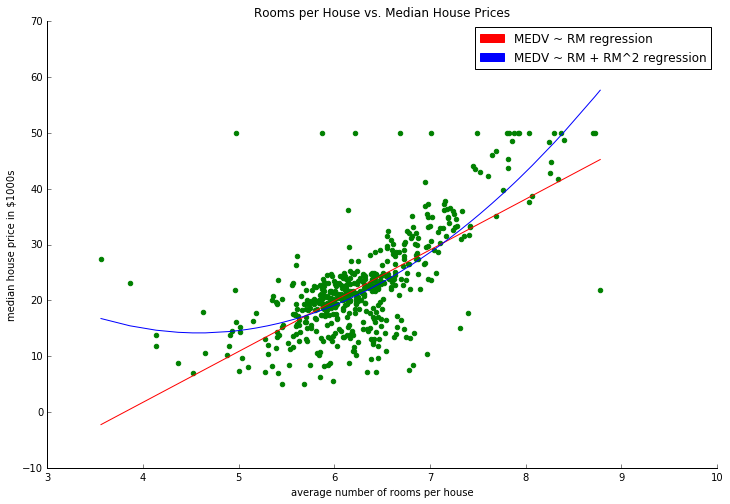

In [97]:
boston_rm_sorted = np.sort(boston_rm, axis=0)
boston_rm2_sorted = np.sort(boston_rm2, axis=0)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(boston_rm_sorted, rm_medv_reg.predict(boston_rm_sorted), color='red')
ax.plot(boston_rm_sorted, rm_medv_reg2.predict(boston_rm2_sorted), color='blue')
ax.scatter(boston_rm, bdata.target, color='green')
ax.set_title('Rooms per House vs. Median House Prices')
ax.set_xlabel('average number of rooms per house')
ax.set_ylabel('median house price in $1000s')
simple_axes(ax)

red_patch = mpatches.Patch(color='red', label='MEDV ~ RM regression')
blue_patch = mpatches.Patch(color='blue', label='MEDV ~ RM + RM^2 regression')
ax.legend(handles=[red_patch, blue_patch])


## Part 2: Gradient descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (Average rooms per house)

Implement the basic gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the number of rooms per house. Experiment with 3-4 different values of the learning rate *R*, and do the following:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.

* *Hint 1: Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to (a) check to see if the loss has stopped decreasing; and (b) check if both your current parameter esimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 0.0001).*
* *Hint 2: Some people like to include a MaxIterations parameter in their gradient descent algorithm, to prevent divergence. *
* *Hint 3: R = 0.005 is a reasonable first guess - but try some others to see how it affects your results. *

In [121]:
import time

"""
Function
--------
bivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient
"""
def bivariate_ols(xvalues, yvalues, R=0.01, MaxIterations=1000):
    xvalues = np.asarray(xvalues)
    yvalues = np.asarray(yvalues)
    def cost(alpha, beta):
        return (1 / (2 * len(xvalues))) * (alpha + beta * xvalues - yvalues) ** 2;
    def alpha_derivate_cost(alpha, beta):
        return (1 / len(xvalues)) * (alpha + beta * xvalues - yvalues)
    def beta_derivate_cost(alpha, beta):
        return (1 / len(xvalues)) * (alpha + beta * xvalues - yvalues) * xvalues
        
    EPSILON = 0.0001
    RANGE_SIZE = 500
    
    # initialize the parameters
    start_time = time.time()
    
    alpha = np.random.rand() * RANGE_SIZE - RANGE_SIZE / 2
    beta = np.random.rand() * RANGE_SIZE - RANGE_SIZE / 2
    prev_cost = cost(alpha, beta)
    for i in range(MaxIterations): 
        pass
    
    print "Time taken: " + str(round(time.time() - start_time,2)) + " seconds"
    return alpha, beta


# example function call
# print bivariate_ols(X, Y, 0.01, 100000)
print bivariate_ols([0, 1], [2, 3])
# print np.asarray([1, 2, 3]) * 2.6

Time taken: 0.0 seconds
(102.92450228592537, -203.7384989053541)


*Enter your observations here*

### 2.2 Data normalization

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, however, you should re-scale your features to ensure that no single feature dominates the cost function. Write a simple function to [standardize](http://en.wikipedia.org/wiki/Standard_score) a feature. * This is done for you!*

In [ ]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using CRIM and RM as independent variables. Standardize these variables before before inputting them to the gradient descent algorithm. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with 2-3 different values of R.

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem - see 2.2 above for an example.*

In [64]:
"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def multivariate_ols(xvalue_matrix, yvalues, R=0.01, MaxIterations=1000):
    # your code here
    return alpha, beta_array

*Enter your observations here*

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original data. Use the same three values of R (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [ ]:
# Your code here

## 3. Prediction

Let's use our fitted model to make predictions about housing prices. Since the focus is now on prediction rather than the interpretation of the coefficients, make sure to use the standardized version of your features in everything that follows.

### 3.1 Cross-Validation

Unless you were careful above, you probably overfit your data again.  Use 10-fold cross-validation to re-fit the multivariate regression from 2.3 above, and report your estimated coefficients (there should be three coefficients for each fold, corresponding to the intercept and the two coefficients for CRIM and RM). 

How do your estimated coefficients from cross-validation compare to the ones you estimated in 2.3 above? How do they compare to the ones estimated using standard packages?

In [141]:
# Your code here

*Discuss your results here*

### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Report the average 10-fold cross-validated RMSE, separately for the training data and for the testing data. 

In other words, run 10-fold cross-validation. In each of the 10 iterations, you will fit a model on 90% of the data. Use that model to generate predicted outputs for 100% of the data. For that iteration, the training RMSE is the RMSE calculated across the (90%) training data, and the test RMSE is the RMSE calculated across the (10%) test data. The average 10-fold cross-validated RMSE is the average of the 10 iterations.

What is your test RMSE?  How does it compare to the performance of your nearest neighbor algorithm from the last problem set?

In [ ]:
# Your code here

*Discuss your results here*

### Extra Credit: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $400,000. Use your model  a logistic regression of EXPENSIVE on CHAS and RM. Report your results.

In [ ]:
# Your code here

*Discuss your results here*

## 4 Regularization 

### 4.1 Get prepped

Step 1: For each of the continuous features F in the original dataset, create a standardized version F_1.  Now, create polynomials up to degree 6 of each F_1: the square of F_1 (call this F_2); the cube of F_1 (call this F_3); and so forth up to F_6. If you originally had *K* features, you should now have *6K* features (i.e., we're going to ignore the original unscaled features for the remainder of this problem).

Step 2: For simplicity, generate a single training and testing set.  Randomly sample 66% of your data and call this the training set, and set aside the remaining 34% as your test set.

In [142]:
# Your code here

### 4.2 Let's overfit!
Now, using your version of multivariate regression from 2.3, (over)fit your model on the training data. Using your training set, regress housing price on as many of those *6K* features as you can.  If you get too greedy, or if you did not efficiently implement your solution to 2.3, it's possible this will take a long time to compute.

Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 2.5 and nearest neighbors?

In [ ]:
# Your code here

*Discuss your results here*

### 4.3 Ridge regularization
Incorporate L2 (Ridge) regularization into your multivariate_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

Use your regularized regression to re-fit the model from 4.2 above on your training data. Try this for several different values of lambda, and report your RMSE for each lambda separately for your training and testing data. How do these numbers compare to each other, to the RMSE from 4.2,  to the RMSE from 2.3, and to the RMSE from nearest neighbors?

Go brag to your friends about how you just implemented ridge-regularized multivariate regression using gradient descent optimization, from scratch. If you still have friends.

In [ ]:
# Your code here

*Discuss your results here*

### Extra Credit 2: Cross-validate lambda

Use k-fold cross-validation to select the optimal value of lambda. Report the average RMSE across all training sets, and the average RMSE across all testing sets. How do these numbers compare to each other, to the RMSE from your previous efforts?  Finally, create a scatter plot that shows RMSE as a function of lambda.

In [ ]:
# Your code here

*Discuss your results here*

### (Showoff) Extra Credit 3: Lambda and coefficients

If you're feeling extra-special, create a parameter plot that shows how the different coefficient estimates change as a function of lambda. To make this graph intelligible, only include the *K* original F_s features in this plot.

In [ ]:
# Your code here

*Discuss your results here*